In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from itertools import cycle, islice

In [2]:
plt.rcParams['figure.figsize'] = 12,8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Кластеры в форме кругов с различной дисперсией
random_state = 170
X, y = datasets.make_blobs(n_samples = n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5])
varied = X

# Кластеры лентовидной формы
random_state=170
X, y = datasets.make_blobs(n_samples = n_samples, random_state=random_state)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
aniso = np.dot(X,transformation)

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# Оставляем только признаки датасета, т.к. для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X, y = noisy_moons
noisy_moons = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

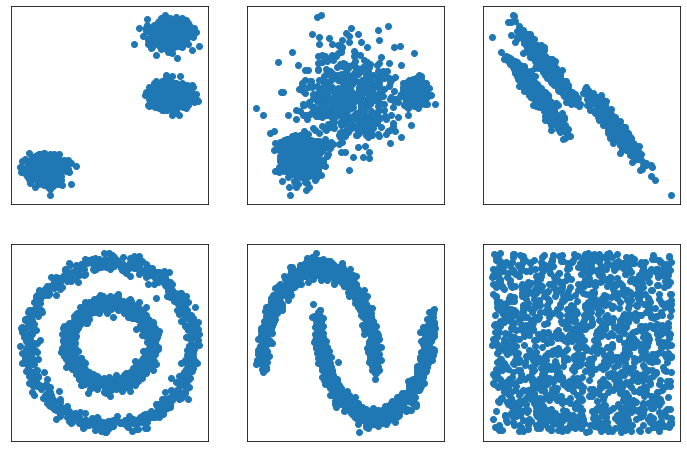

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:,0], X[:,1])


# KMeans

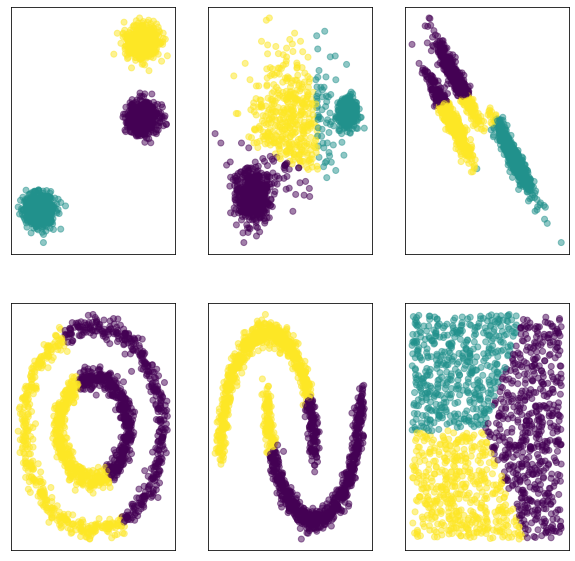

In [86]:
from sklearn.cluster import KMeans

datasets_params_list = [(blobs, {'n_clusters': 3}),
                        (varied, {'n_clusters': 3}),
                        (aniso, {'n_clusters': 3}),
                        (noisy_circles, {'n_clusters': 2}),
                        (noisy_moons, {'n_clusters': 2}),
                        (no_structure, {'n_clusters': 3})]

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#000000']
          #'#f781bf', '#a65628', '#984ea3',
          #'#999999', '#e41a1c', '#dede00']

for i, (X, params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    y_pred = KMeans(n_clusters = params['n_clusters']).fit(X).predict(X)
    
    #X = np.column_stack((X,y_pred))
        
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    #for c in set(y_pred):
    #    X_tmp = X[np.where(y_pred==c)]
    #    plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])
    plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=.5)

In [6]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

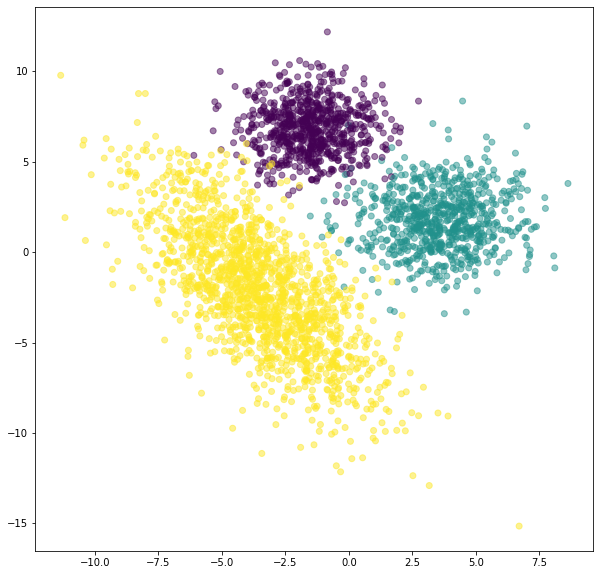

In [7]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [8]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [9]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

print(np.round(k_means.cluster_centers_).astype(int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [10]:
clusters, counts = np.unique(k_means.labels_, return_counts=True)
dict(zip(clusters, counts))

{0: 1320, 1: 938, 2: 742}

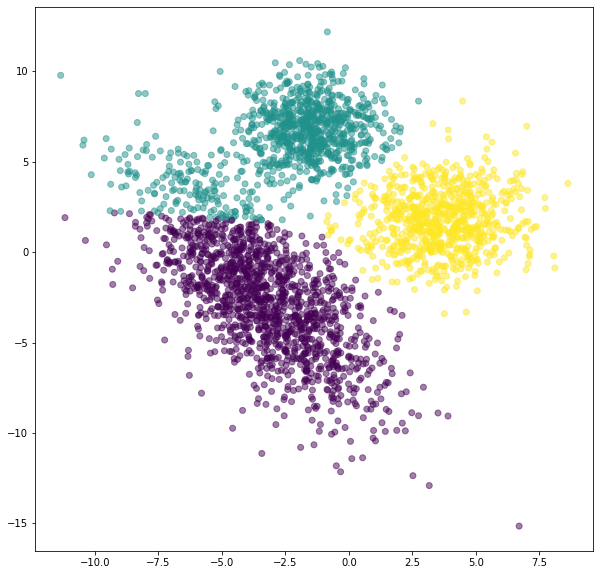

In [11]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=k_means.labels_, alpha=.5)
plt.show()

В датасете для учеников предоставлены следующие признаки:  

* Год выпуска  
* Пол  
* Возраст  
* Количество друзей  

36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)
Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.  

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.  

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [12]:
data = pd.read_csv('snsdata.csv')
data.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [14]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

<AxesSubplot:>

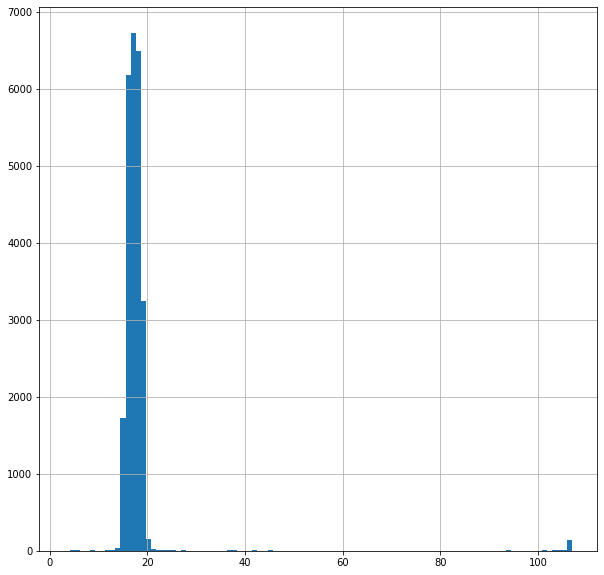

In [15]:
data.age.hist(bins=100)

In [16]:
X = np.array(data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

In [17]:
clusters, counts = np.unique(k_means.labels_, return_counts=True)
dict(zip(clusters, counts))

{0: 5036, 1: 1337, 2: 752, 3: 697, 4: 20024, 5: 1, 6: 846, 7: 466, 8: 841}

In [18]:
data['cluster'] = k_means.labels_

In [19]:
data[data.drunk>5]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
1213,2006,M,18.626,37,0,1,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
2265,2006,NaN,NaN,55,1,0,0,0,0,0,...,1,0,0,0,0,3,1,6,0,1
2973,2006,F,18.264,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
5216,2006,M,18.861,46,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,0,1
5451,2006,NaN,NaN,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,6,0,1
6516,2006,M,18.374,64,0,0,0,0,0,0,...,0,0,1,0,1,2,1,8,4,1
8003,2007,F,17.572,28,1,2,0,1,0,0,...,3,0,1,0,0,1,0,7,1,6
12223,2007,F,17.432,15,0,0,0,0,0,0,...,2,0,0,0,0,2,0,7,0,1
12453,2007,F,17.284,45,0,1,0,0,0,0,...,0,0,1,0,0,0,0,8,0,1
12929,2007,F,17.133,129,0,2,0,0,1,0,...,0,1,0,0,0,1,1,8,0,1


In [20]:
df = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
clusters = []
top_words = []
for k,group in df.groupby(data.cluster):
    clusters.append(k)
    top_words.append(list(group.drop('cluster', axis=1).sum().sort_values(ascending=False).index[:10]))
my_dict = dict(zip(clusters,top_words))
for key in my_dict.keys():
    my_dict[key].sort()
my_dict

{0: ['basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'mall',
  'music',
  'shopping'],
 1: ['cute',
  'dance',
  'die',
  'drunk',
  'god',
  'hair',
  'mall',
  'music',
  'sex',
  'shopping'],
 2: ['band',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'marching',
  'music',
  'rock',
  'shopping'],
 3: ['basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'shopping',
  'soccer'],
 4: ['band',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'rock',
  'shopping'],
 5: ['blonde',
  'death',
  'die',
  'dress',
  'drunk',
  'football',
  'god',
  'hair',
  'rock',
  'sex'],
 6: ['clothes',
  'dance',
  'die',
  'drugs',
  'god',
  'hair',
  'kissed',
  'music',
  'rock',
  'sex'],
 7: ['band',
  'bible',
  'church',
  'dance',
  'die',
  'god',
  'hair',
  'jesus',
  'music',
  'shopping'],
 8: ['abercrombie',
  'clothes',
  'cute',
  'dance',
  'god',
  'hair',
  'hollister

In [21]:
ask = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']
ask.sort()
ask

['band',
 'church',
 'cute',
 'dance',
 'football',
 'god',
 'hair',
 'music',
 'rock',
 'shopping']

In [22]:
for k,v in my_dict.items():
    if v == ask:
        print(k)

4


In [23]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [24]:
data.groupby('cluster').count()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,5036,4735,4319,5036,5036,5036,5036,5036,5036,5036,...,5036,5036,5036,5036,5036,5036,5036,5036,5036,5036
1,1337,1242,1159,1337,1337,1337,1337,1337,1337,1337,...,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337
2,752,706,651,752,752,752,752,752,752,752,...,752,752,752,752,752,752,752,752,752,752
3,697,646,589,697,697,697,697,697,697,697,...,697,697,697,697,697,697,697,697,697,697
4,20024,17937,16369,20024,20024,20024,20024,20024,20024,20024,...,20024,20024,20024,20024,20024,20024,20024,20024,20024,20024
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,846,798,727,846,846,846,846,846,846,846,...,846,846,846,846,846,846,846,846,846,846
7,466,434,386,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466
8,841,777,713,841,841,841,841,841,841,841,...,841,841,841,841,841,841,841,841,841,841


# EM-алгоритм

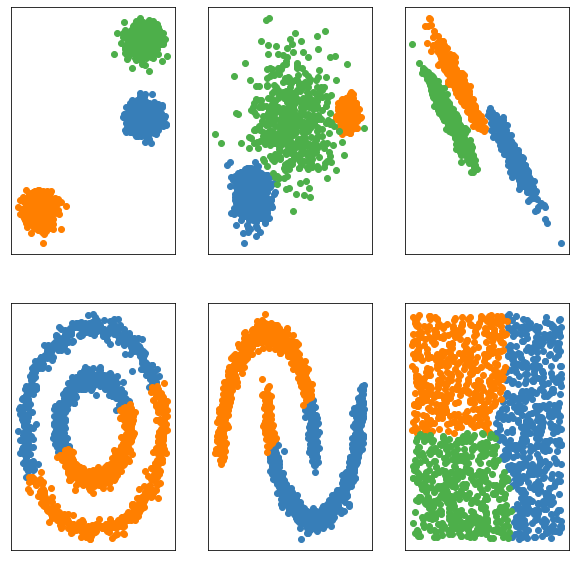

In [25]:
from sklearn.mixture import GaussianMixture

datasets_params_list = [(blobs, {'n_clusters': 3}),
                        (varied, {'n_clusters': 3}),
                        (aniso, {'n_clusters': 3}),
                        (noisy_circles, {'n_clusters': 2}),
                        (noisy_moons, {'n_clusters': 2}),
                        (no_structure, {'n_clusters': 3})]

colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

for i, (X, params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    y_pred = GaussianMixture(n_components = params['n_clusters']).fit(X).predict(X)
    #y_pred = GaussianMixture(n_components = 5).fit(X).predict(X)
        
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    for c in set(y_pred):
        X_tmp = X[np.where(y_pred==c)]
        plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])

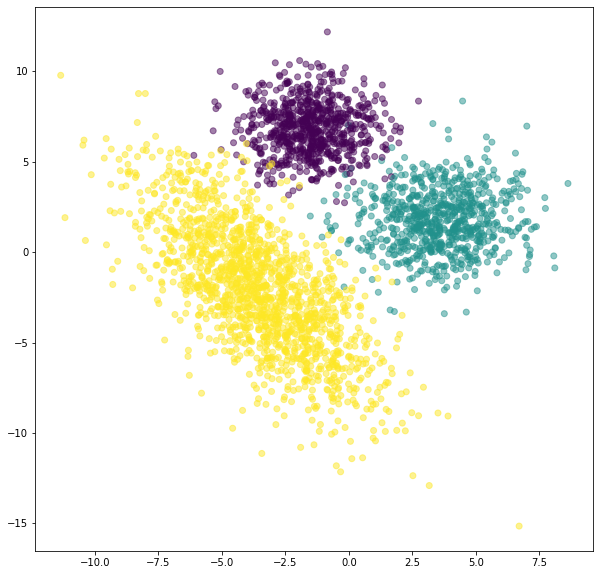

In [26]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [27]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Initialization 0
  Iteration 1	 time lapse 0.04488s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.02045
  Iteration 3	 time lapse 0.00199s	 ll change 0.02017
  Iteration 4	 time lapse 0.00199s	 ll change 0.01705
  Iteration 5	 time lapse 0.00100s	 ll change 0.00902
  Iteration 6	 time lapse 0.00199s	 ll change 0.00254
  Iteration 7	 time lapse 0.00199s	 ll change 0.00047
Initialization converged: True	 time lapse 0.05585s	 ll -5.15569


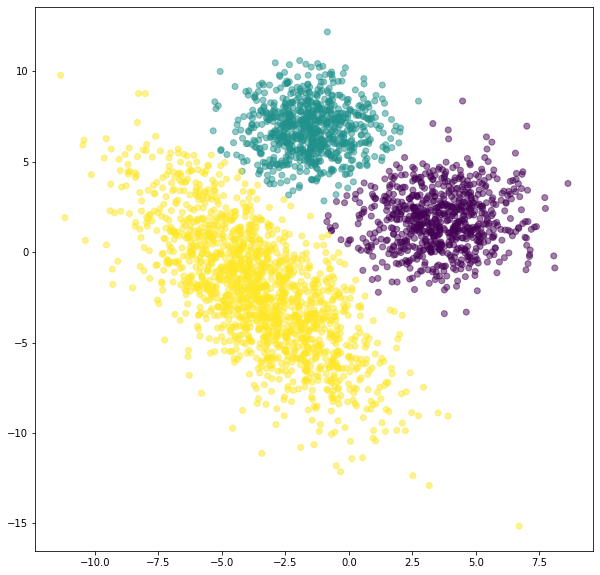

In [28]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=3, verbose=2, verbose_interval=1, random_state=42)
y_pred = em_gm.fit_predict(X)

#y_pred

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=.5)
plt.show()

In [29]:
np.round(em_gm.means_,0).astype(int)

array([[ 4,  2],
       [-2,  7],
       [-4, -2]])

In [30]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))
for count in counts:
    print(count, end=' ')

744 763 1493 

Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним EM-алгоритм , количество кластеров — 9, random_state = 123. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [31]:
data = pd.read_csv('snsdata.csv')
data.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [33]:
X = np.array(data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
X = StandardScaler().fit_transform(X)

em = GaussianMixture(n_components=9, random_state=123, verbose=2, verbose_interval=1)
data['cluster'] = em.fit_predict(X)

data['cluster'].iloc[7]

Initialization 0
  Iteration 1	 time lapse 0.62034s	 ll change inf
  Iteration 2	 time lapse 0.34508s	 ll change 16.31044
  Iteration 3	 time lapse 0.34308s	 ll change 3.52018
  Iteration 4	 time lapse 0.32912s	 ll change 3.68556
  Iteration 5	 time lapse 0.33510s	 ll change 9.70360
  Iteration 6	 time lapse 0.31815s	 ll change 10.19660
  Iteration 7	 time lapse 0.37899s	 ll change 6.70510
  Iteration 8	 time lapse 0.34408s	 ll change 3.31935
  Iteration 9	 time lapse 0.33810s	 ll change 0.47656
  Iteration 10	 time lapse 0.31715s	 ll change 0.52849
  Iteration 11	 time lapse 0.33710s	 ll change 0.04922
  Iteration 12	 time lapse 0.35405s	 ll change 0.02281
  Iteration 13	 time lapse 0.32912s	 ll change 0.02046
  Iteration 14	 time lapse 0.33809s	 ll change 0.01454
  Iteration 15	 time lapse 0.31715s	 ll change 0.01319
  Iteration 16	 time lapse 0.36103s	 ll change 0.00829
  Iteration 17	 time lapse 0.35106s	 ll change 0.00523
  Iteration 18	 time lapse 0.32613s	 ll change 0.00437
  It

3

# Agglomerative Clustering

В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности. Так мы получаем расстояние между объектами датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу. Обучаем алгоритм, игнорируем предупреждения и строим предсказания.

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

X = [[2,2],
     [5,2],
     [8,2],
     [8,6],
     [5,6],
     [2,6]]

X = StandardScaler().fit_transform(X)

# строим матрицу смежности
connectivity = kneighbors_graph(X,
                              n_neighbors=3,
                              mode='distance',
                              include_self=False)
connectivity.toarray()

#knn_graph = kneighbors_graph(X, 3, include_self=False)
#for connectivity in (None, knn_graph):
#    print(connectivity)


array([[0.        , 1.22474487, 0.        , 0.        , 2.34520788,
        2.        ],
       [1.22474487, 0.        , 1.22474487, 0.        , 2.        ,
        0.        ],
       [0.        , 1.22474487, 0.        , 2.        , 2.34520788,
        0.        ],
       [0.        , 2.34520788, 2.        , 0.        , 1.22474487,
        0.        ],
       [0.        , 2.        , 0.        , 1.22474487, 0.        ,
        1.22474487],
       [2.        , 2.34520788, 0.        , 0.        , 1.22474487,
        0.        ]])

In [35]:
# в матрице смежности от kneighbors_graph строки - это исходящие ребра к n_neighbors ближайшим соседям
# а столбцы - это входящие ребра от n_neighbors ближайших соседей.
# сделаем матрицу смежности симметричной
connectivity = 0.5*(connectivity + connectivity.T)
connectivity.toarray()[:,0].sum()

4.397348811347446

In [36]:
X = blobs
# строим матрицу смежности
connectivity = kneighbors_graph(X, n_neighbors=10)
for i in range(5):
    print(f'Количество исходящих ребер вершины {i}: {connectivity.toarray()[i].sum()}')
    print(f'Количество входящих ребер вершины {i}: {connectivity.toarray()[:,i].sum()}')
# сделаем матрицу смежности симметричной
connectivity = 0.5*(connectivity + connectivity.T)
print('А в симметричной матрице:')
for i in range(5):
    print(f'Количество исходящих ребер вершины {i}: {connectivity.toarray()[i].sum()}')
    print(f'Количество входящих ребер вершины {i}: {connectivity.toarray()[:,i].sum()}')

Количество исходящих ребер вершины 0: 10.0
Количество входящих ребер вершины 0: 12.0
Количество исходящих ребер вершины 1: 10.0
Количество входящих ребер вершины 1: 14.0
Количество исходящих ребер вершины 2: 10.0
Количество входящих ребер вершины 2: 8.0
Количество исходящих ребер вершины 3: 10.0
Количество входящих ребер вершины 3: 4.0
Количество исходящих ребер вершины 4: 10.0
Количество входящих ребер вершины 4: 9.0
А в симметричной матрице:
Количество исходящих ребер вершины 0: 11.0
Количество входящих ребер вершины 0: 11.0
Количество исходящих ребер вершины 1: 12.0
Количество входящих ребер вершины 1: 12.0
Количество исходящих ребер вершины 2: 9.0
Количество входящих ребер вершины 2: 9.0
Количество исходящих ребер вершины 3: 7.0
Количество входящих ребер вершины 3: 7.0
Количество исходящих ребер вершины 4: 9.5
Количество входящих ребер вершины 4: 9.5


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:549: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:549: UserWarning: the number of connected components of the connectivity matrix is 78 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:549: UserWarning: the number of connected components of the connectivity matrix is 51 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_a

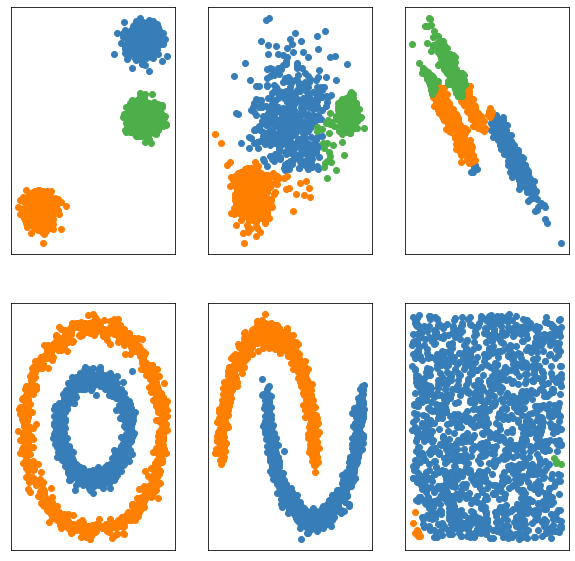

In [37]:
datasets_params_list = [(blobs, {'n_clusters': 3, 'n_neighbors': 10}),
                        (varied, {'n_clusters': 3, 'n_neighbors': 2}),
                        (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
                        (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
                        (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
                        (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X,params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5*(connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters = params['n_clusters'],
                                 linkage='average',
                                 connectivity=connectivity).fit(X)
    y_pred = ac.labels_.astype(int)
    
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    for c in set(y_pred):
        X_tmp = X[np.where(y_pred==c)]
        plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])

В результате агломеративная кластеризация справилась лучше, чем EM-алгоритм со сложными кластерами, с ленточными, наоборот, хуже. При отсутствии кластерной структуры агломеративная кластеризация более явно определяет это.

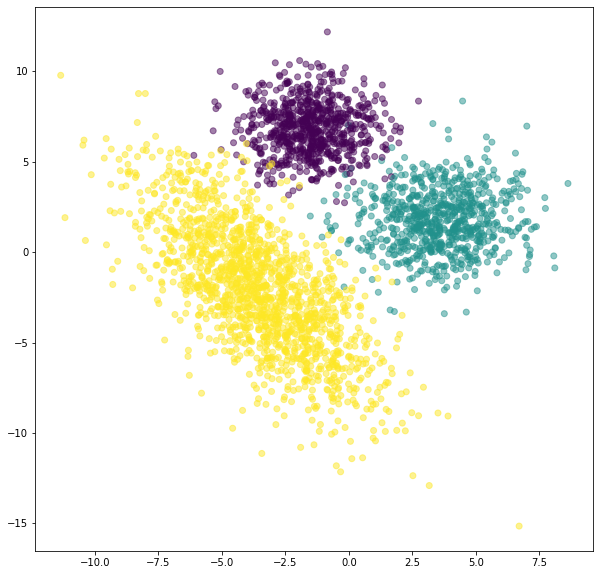

In [38]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [39]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [40]:
from sklearn.cluster import AgglomerativeClustering

#X = StandardScaler().fit_transform(X)
connectivity=kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5*(connectivity + connectivity.T)
ac = AgglomerativeClustering(n_clusters = 3,
                             #linkage='average',
                             connectivity=connectivity
                            ).fit(X)
ac.n_leaves_

3000

In [41]:
unique, counts = np.unique(ac.labels_, return_counts=True)
print(dict(zip(unique,counts)))
for count in counts:
    print(count, end=' ')

{0: 1486, 1: 746, 2: 768}
1486 746 768 

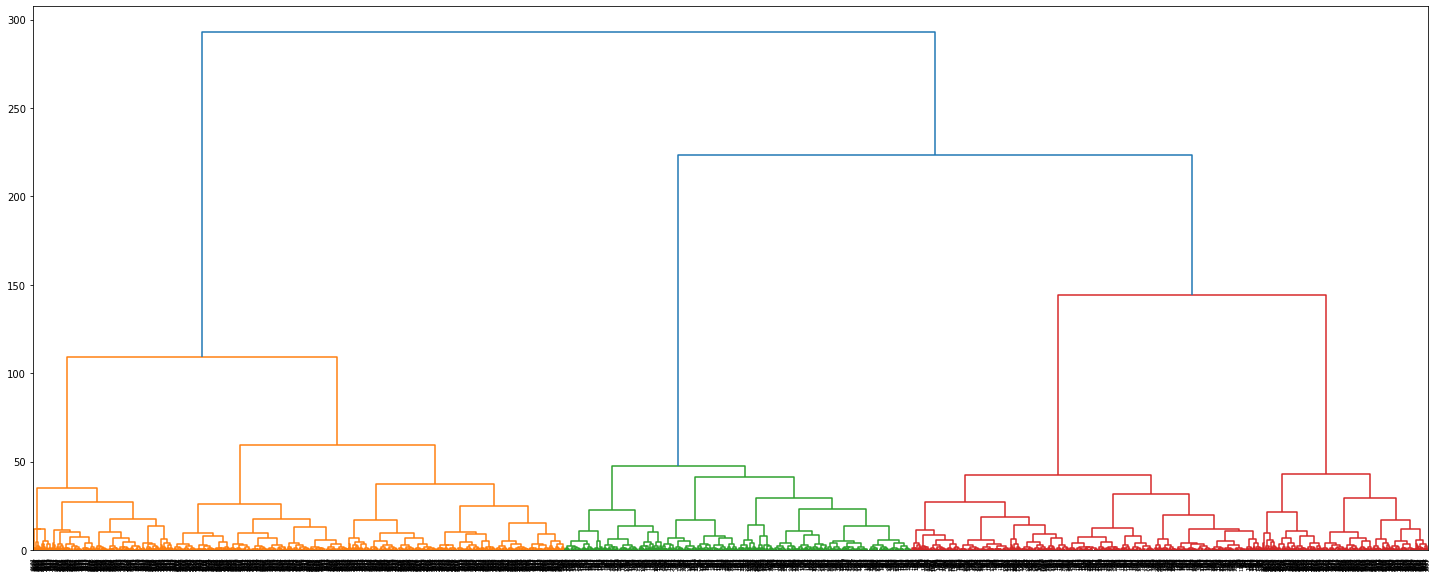

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# еще один способ выполнить агломеративную кластеризацию
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z, leaf_rotation=90)
plt.show()

In [43]:
df = pd.read_csv('food.txt', sep=' ')
df

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


In [44]:
X = np.array(df.drop('Name', axis=1))
X = StandardScaler().fit_transform(X)

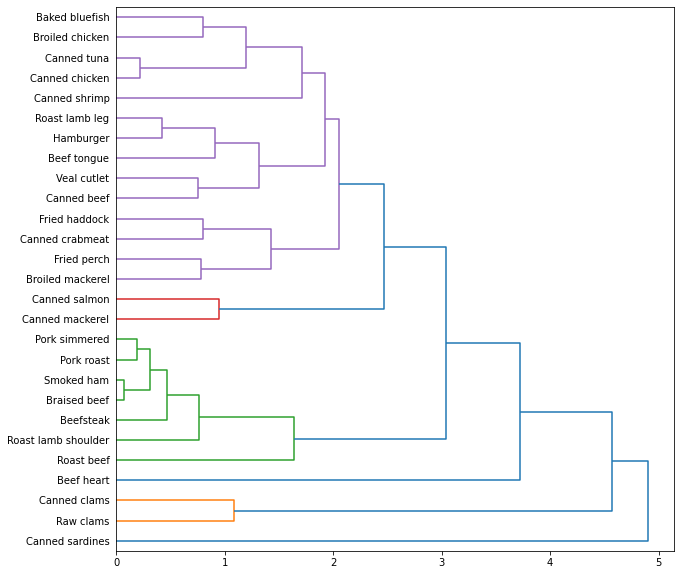

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z,
                  color_threshold=2.3,
                  labels=names, 
                  orientation='right')

In [46]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')
len(labels)

27

In [47]:
# Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.
df['label'] = labels
df[df.Calcium.between(150,161)]

,Name,Energy,Protein,Fat,Calcium,Iron,label
21,Canned mackerel,155,16,9,157,1.8,3
23,Canned salmon,120,17,5,159,0.7,3


In [48]:
# Введите номер кластера, в который попал продукт с максимальной жирностью.
df[df.Fat == df.Fat.max()]

,Name,Energy,Protein,Fat,Calcium,Iron,label
2,Roast beef,420,15,39,7,2.0,2


# DBSCAN

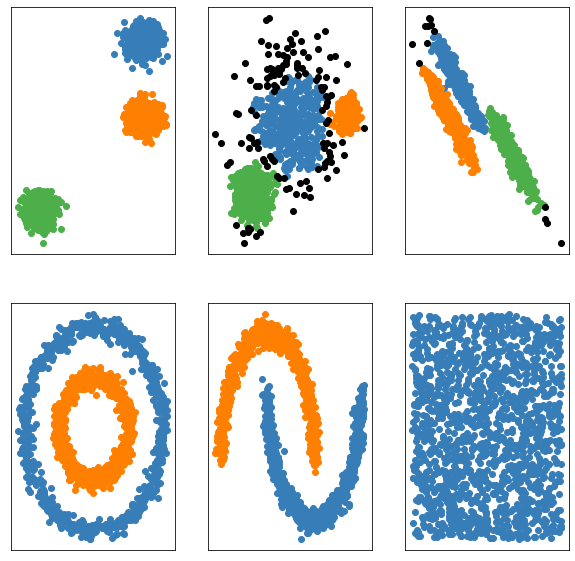

In [87]:
from sklearn.cluster import DBSCAN

datasets_params_list = [(blobs, {'eps': 0.3, 'min_samples': 5}),
                        (varied, {'eps': 0.18, 'min_samples': 10}),
                        (aniso, {'eps': 0.184, 'min_samples': 5}),
                        (noisy_circles, {'eps': 0.3, 'min_samples': 5}),
                        (noisy_moons, {'eps': 0.3, 'min_samples': 5}),
                        (no_structure, {'eps': 0.3, 'min_samples': 5})]

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#000000']

for i, (X,params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
       
    dbs = DBSCAN(eps=params['eps'], min_samples=params['min_samples']).fit(X)
    y_pred = dbs.labels_.astype(int)
    
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    for c in set(y_pred):
        X_tmp = X[np.where(y_pred==c)]
        plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])

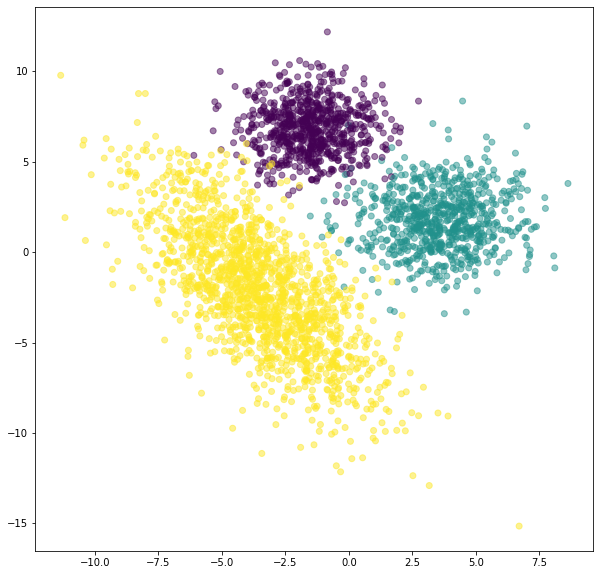

Количество элементов разных классов
{0: 750, 1: 750, 2: 1500}


In [89]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
print('Количество элементов разных классов')
print(dict(zip(unique, counts)))

In [96]:
# Обучите модель DBSCAN с параметрами eps=0.9 и min_samples=35 на признаках объектов исходного датасета.
# Выведите число получившихся кластеров.
# Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1.
#Кластер выбросов учитывать в ответе не нужно.

X_stand = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.8, min_samples=35).fit(X)
y_pred = dbscan.labels_.astype(int)
unique, counts = np.unique(y_pred, return_counts=True)
print('Количество элементов разных классов')
print(dict(zip(unique, counts)))

# Проверьте, как настройка параметров влияет на результат работы DBSCAN.
# Обучите модель DBSCAN с параметрами eps=0.8 и min_samples=35 на признаках объектов исходного датасета.
# Выведите число объектов выборки, которые были отмечены как выбросы.

Количество элементов разных классов
{-1: 583, 0: 603, 1: 681, 2: 1133}


In [93]:
# Коэффициент силуэта можно посчитать при помощи реализации из библиотеки sklearn:
from sklearn.metrics import silhouette_score
# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.40304933899621376

In [100]:
# Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42.
# Посчитайте коэффициент силуэта для получившейся кластеризации.
# Ответ округлите до десятых и запишите с точкой.
em = GaussianMixture(n_components=3, random_state=42)
y_pred = em.fit_predict(X)
round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),3)

0.499

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:  

* K-means — n_clusters=3, random_state=42  
* EM-алгоритм (GaussianMixture) — n_components=3, random_state=42  
* Агломеративная кластеризация – n_clusters=3  
* DBSCAN – eps=0.9, min_samples=35  

Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [102]:
clst_list = [KMeans(n_clusters=3, random_state=42),
             GaussianMixture(n_components=3, random_state=42),
             AgglomerativeClustering(n_clusters=3),
             DBSCAN(eps=0.9, min_samples=35)]

for i, clst in enumerate(clst_list, start=1):
    y_pred = clst.fit_predict(X)
    score = round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),3)
    print(f'Silhouette score for {clst}: {score}')

Silhouette score for KMeans(n_clusters=3, random_state=42): 0.513
Silhouette score for GaussianMixture(n_components=3, random_state=42): 0.499
Silhouette score for AgglomerativeClustering(n_clusters=3): 0.481
Silhouette score for DBSCAN(eps=0.9, min_samples=35): 0.445


Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.  

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.  

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.  

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [211]:
clst_list = [(KMeans,{'n_clusters':3,'random_state':42}),
             (GaussianMixture,{'n_components':3,'random_state':42}),
             (AgglomerativeClustering,{'n_clusters':3})]

for (clst, params) in clst_list:
    for i in range(2,11):
        kwargs = params
        kwargs[list(kwargs.keys())[0]]=i
        clusterer = clst(**kwargs)
        y_pred = clusterer.fit_predict(X)
        score = round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),3)
        print(f'Silhouette score for {clusterer}: {score}')

Silhouette score for KMeans(n_clusters=2, random_state=42): 0.455
Silhouette score for KMeans(n_clusters=3, random_state=42): 0.513
Silhouette score for KMeans(n_clusters=4, random_state=42): 0.511
Silhouette score for KMeans(n_clusters=5, random_state=42): 0.481
Silhouette score for KMeans(n_clusters=6, random_state=42): 0.462
Silhouette score for KMeans(n_clusters=7, random_state=42): 0.397
Silhouette score for KMeans(random_state=42): 0.333
Silhouette score for KMeans(n_clusters=9, random_state=42): 0.33
Silhouette score for KMeans(n_clusters=10, random_state=42): 0.333
Silhouette score for GaussianMixture(n_components=2, random_state=42): 0.455
Silhouette score for GaussianMixture(n_components=3, random_state=42): 0.499
Silhouette score for GaussianMixture(n_components=4, random_state=42): 0.511
Silhouette score for GaussianMixture(n_components=5, random_state=42): 0.481
Silhouette score for GaussianMixture(n_components=6, random_state=42): 0.463
Silhouette score for GaussianMixtur

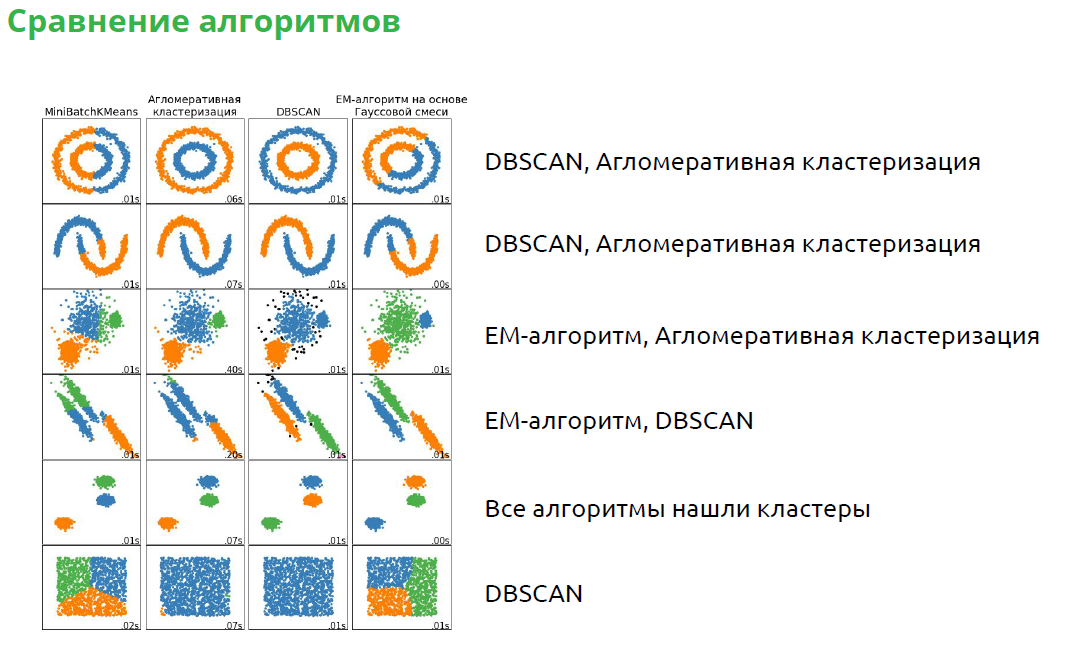

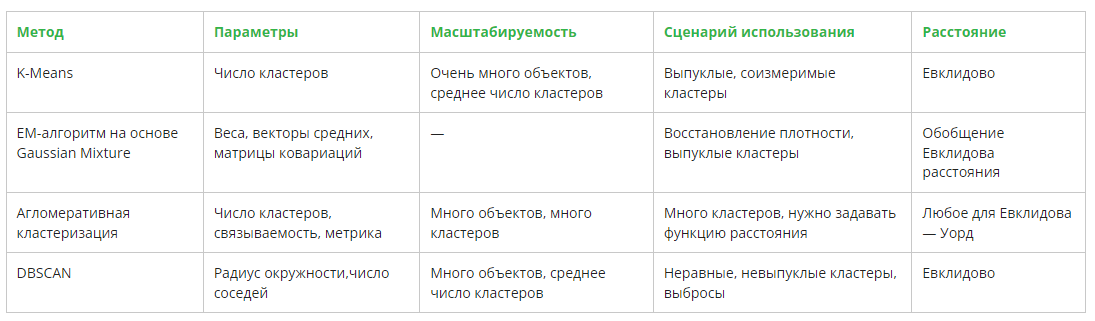

In [212]:
# Однородность можно посчитать при помощи реализации из библиотеки sklearn:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler


# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X_st = StandardScaler().fit_transform(X)
kmeans.fit(X_st)
kmeans_pred = kmeans.labels_ 
# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.8025180661661425

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:  

* k-means — n_clusters=3, random_state=42  
* GaussianMixture — n_components=3, random_state=42  
* AgglomerativeClustering — n_clusters=3  
* DBSCAN — eps=0.9, min_samples=35  

В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.  

При решении задания модуля стандартизация должна быть включена.

In [214]:
clst_list = [KMeans(n_clusters=3, random_state=42),
             GaussianMixture(n_components=3, random_state=42),
             AgglomerativeClustering(n_clusters=3),
             DBSCAN(eps=0.9, min_samples=35)
            ]
for clusterer in clst_list:
    y_pred = clusterer.fit_predict(X_st)
    score = round(homogeneity_score(labels_true=y, labels_pred=y_pred),3)
    print(f'Homogeneity score for {clusterer}: {score}')

Homogeneity score for KMeans(n_clusters=3, random_state=42): 0.803
Homogeneity score for GaussianMixture(n_components=3, random_state=42): 0.934
Homogeneity score for AgglomerativeClustering(n_clusters=3): 0.91
Homogeneity score for DBSCAN(eps=0.9, min_samples=35): 0.0


In [215]:
# Полноту можно посчитать при помощи реализации из библиотеки sklearn:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7842373379017128

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации. Ответ округлите до сотых и запишите с точкой. Не забудьте о стандартизации, она должна быть включена.

In [217]:
em = GaussianMixture(n_components=3, random_state=42)
y_pred = em.fit_predict(X_st)
completeness_score(labels_true=y, labels_pred=y_pred)

0.9325740421656737

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:  

* k-means — n_clusters=3, random_state=42  
* GaussianMixture — n_components=3, random_state=42  
* AgglomerativeClustering — n_clusters=3  
* DBSCAN — eps=0.9, min_samples=35  

В качестве ответа укажите максимальное значение полноты, полученное при помощи данных моделей.  

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [218]:
clst_list = [KMeans(n_clusters=3, random_state=42),
             GaussianMixture(n_components=3, random_state=42),
             AgglomerativeClustering(n_clusters=3),
             DBSCAN(eps=0.9, min_samples=35)
            ]
for clusterer in clst_list:
    y_pred = clusterer.fit_predict(X_st)
    score = round(completeness_score(labels_true=y, labels_pred=y_pred),3)
    print(f'Completeness score for {clusterer}: {score}')

Completeness score for KMeans(n_clusters=3, random_state=42): 0.781
Completeness score for GaussianMixture(n_components=3, random_state=42): 0.933
Completeness score for AgglomerativeClustering(n_clusters=3): 0.906
Completeness score for DBSCAN(eps=0.9, min_samples=35): 0.083


In [220]:
# V-меру можно посчитать при помощи реализации из библиотеки sklearn:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_st)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.791546668267586

In [221]:
em = GaussianMixture(n_components=3, random_state=42)
y_pred = em.fit_predict(X_st)
v_measure_score(labels_true=y, labels_pred=y_pred)

0.9332760595996924

In [222]:
clst_list = [KMeans(n_clusters=3, random_state=42),
             GaussianMixture(n_components=3, random_state=42),
             AgglomerativeClustering(n_clusters=3),
             DBSCAN(eps=0.9, min_samples=35)
            ]
for clusterer in clst_list:
    y_pred = clusterer.fit_predict(X_st)
    score = round(v_measure_score(labels_true=y, labels_pred=y_pred),3)
    print(f'V-measure score for {clusterer}: {score}')

V-measure score for KMeans(n_clusters=3, random_state=42): 0.792
V-measure score for GaussianMixture(n_components=3, random_state=42): 0.933
V-measure score for AgglomerativeClustering(n_clusters=3): 0.908
V-measure score for DBSCAN(eps=0.9, min_samples=35): 0.001
